In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pyod.utils.data import generate_data
from pyod.models.ocsvm import OCSVM
from pyod.models.deep_svdd import DeepSVDD
from sklearn.metrics import balanced_accuracy_score, roc_auc_score

%matplotlib inline

## Data Generation

In [3]:
contamination = 0.15
n_train = 300
n_test = 200
n_features = 3

X_train, X_test, y_train, y_test = generate_data(
    n_train=n_train,
    n_test=n_test,
    n_features=n_features,
    contamination=contamination,
    random_state=1
)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (300, 3)
Test data shape: (200, 3)


## Helper visualization

In [4]:
def plot_results(X_train, y_train, train_pred, X_test, y_test, test_pred, title):
    fig = plt.figure(figsize=(20, 15))
    fig.suptitle(title, fontsize=16)

    # Train Ground Truth
    ax1 = fig.add_subplot(221, projection='3d')
    ax1.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2], c=y_train, cmap='coolwarm', label='Data')
    ax1.set_title('Train Data (Ground Truth)')
    
    # Train Predicted
    ax2 = fig.add_subplot(222, projection='3d')
    ax2.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2], c=train_pred, cmap='coolwarm', label='Data')
    ax2.set_title('Train Data (Predicted)')

    # Test Ground Truth
    ax3 = fig.add_subplot(223, projection='3d')
    ax3.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c=y_test, cmap='coolwarm', label='Data')
    ax3.set_title('Test Data (Ground Truth)')

    # Test Predicted
    ax4 = fig.add_subplot(224, projection='3d')
    ax4.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c=test_pred, cmap='coolwarm', label='Data')
    ax4.set_title('Test Data (Predicted)')

    plt.show()

## OCSVM (Linear Kernel)

--- OCSVM (Linear) ---
Balanced Accuracy: 0.9804
ROC AUC: 0.9992


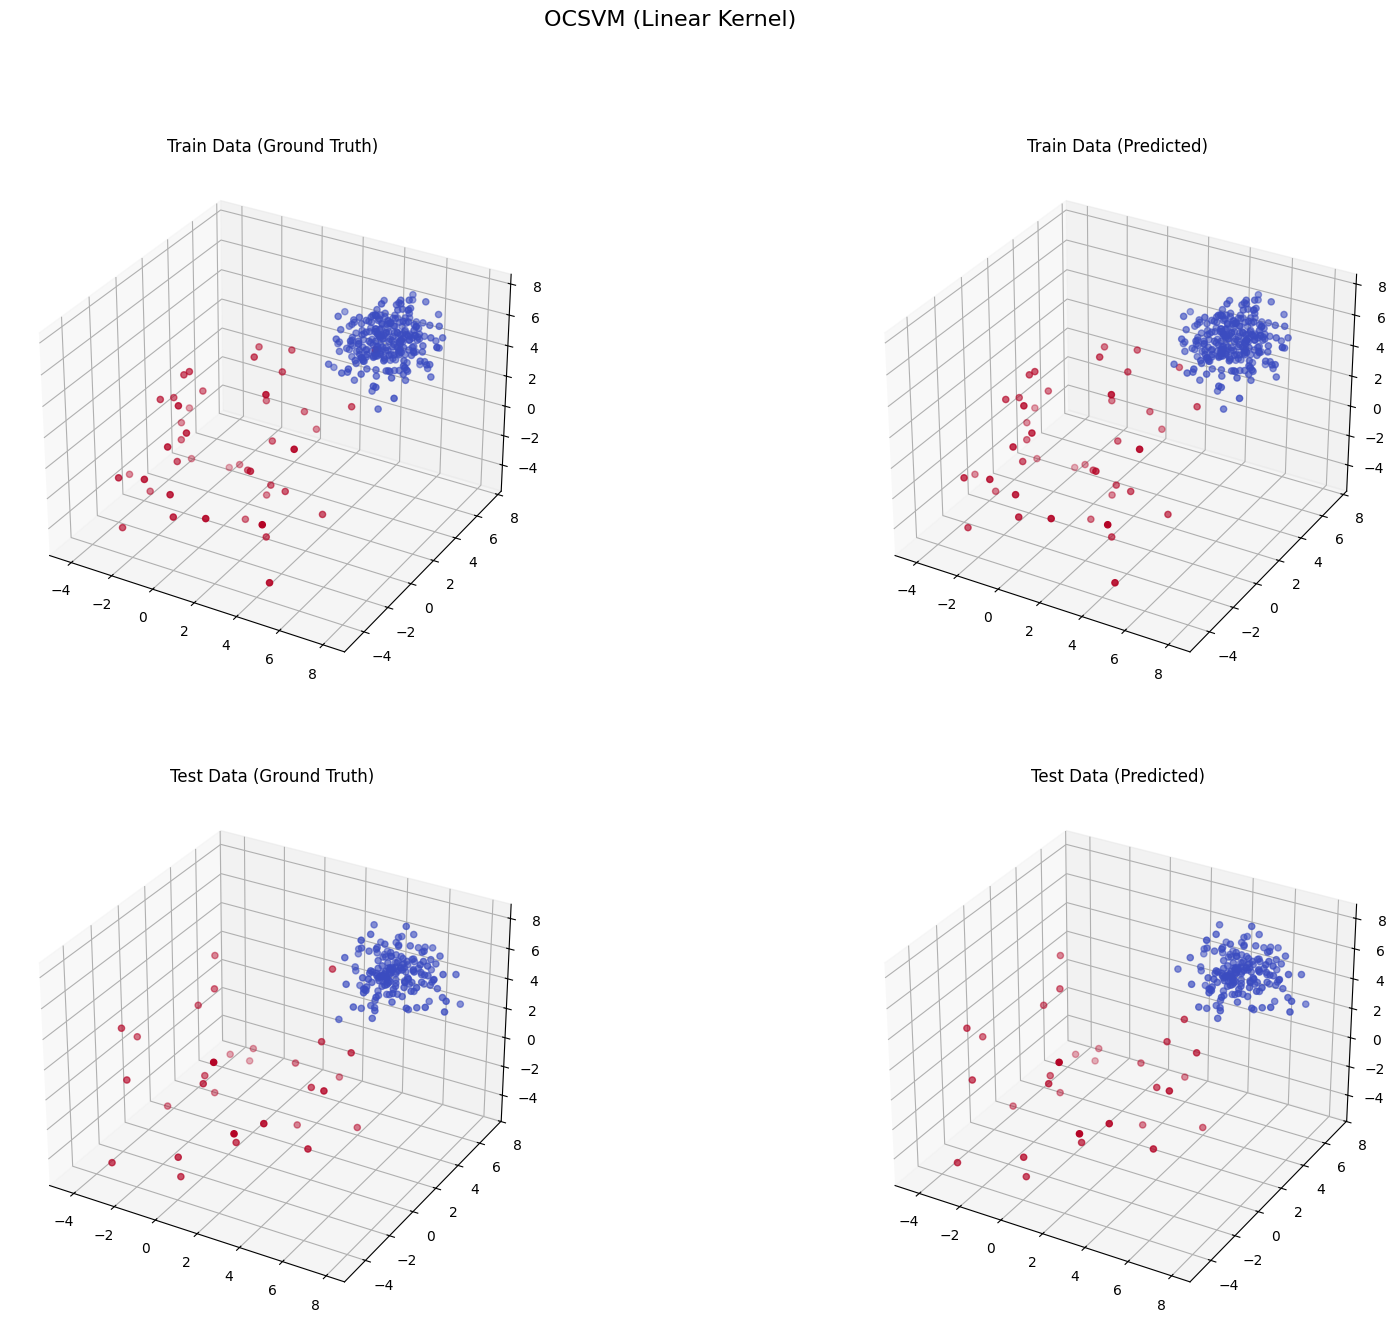

In [5]:
print("--- OCSVM (Linear) ---")
ocsvm_linear = OCSVM(kernel='linear', contamination=contamination)
ocsvm_linear.fit(X_train)

# Predict
y_train_pred_linear = ocsvm_linear.predict(X_train)
y_test_pred_linear = ocsvm_linear.predict(X_test)
y_test_scores_linear = ocsvm_linear.decision_function(X_test)

# Evaluate
ba_linear = balanced_accuracy_score(y_test, y_test_pred_linear)
roc_linear = roc_auc_score(y_test, y_test_scores_linear)

print(f"Balanced Accuracy: {ba_linear:.4f}")
print(f"ROC AUC: {roc_linear:.4f}")

# Visualize
plot_results(X_train, y_train, y_train_pred_linear, X_test, y_test, y_test_pred_linear, "OCSVM (Linear Kernel)")

## OCSVM (RBF Kernel)

--- OCSVM (RBF) ---
Balanced Accuracy: 0.9775
ROC AUC: 0.9969


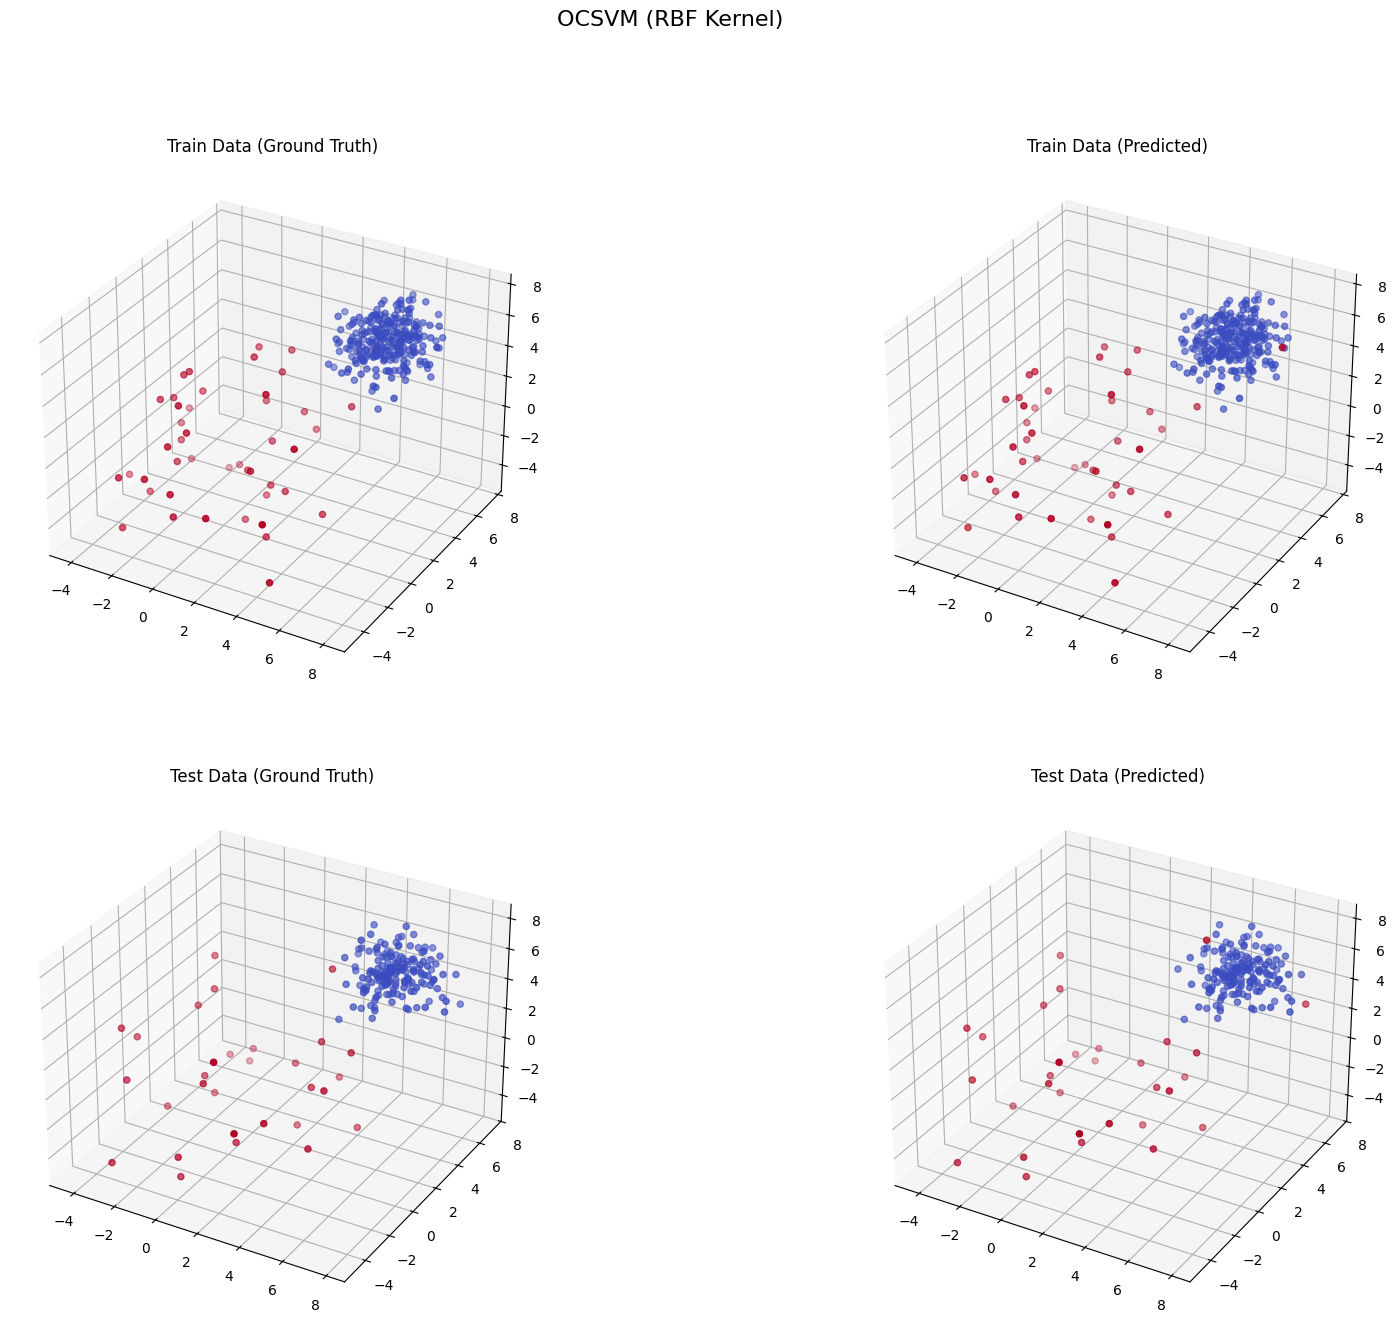

In [6]:
print("--- OCSVM (RBF) ---")
ocsvm_rbf = OCSVM(kernel='rbf', contamination=contamination)
ocsvm_rbf.fit(X_train)

# Predict
y_train_pred_rbf = ocsvm_rbf.predict(X_train)
y_test_pred_rbf = ocsvm_rbf.predict(X_test)
y_test_scores_rbf = ocsvm_rbf.decision_function(X_test)

# Evaluate
ba_rbf = balanced_accuracy_score(y_test, y_test_pred_rbf)
roc_rbf = roc_auc_score(y_test, y_test_scores_rbf)

print(f"Balanced Accuracy: {ba_rbf:.4f}")
print(f"ROC AUC: {roc_rbf:.4f}")

# Visualize
plot_results(X_train, y_train, y_train_pred_rbf, X_test, y_test, y_test_pred_rbf, "OCSVM (RBF Kernel)")

## 5. DeepSVDD

--- DeepSVDD ---
Epoch 1/10, Loss: 8.327557921409607
Epoch 2/10, Loss: 7.8266578912734985
Epoch 3/10, Loss: 8.351408064365387
Epoch 4/10, Loss: 7.785563379526138
Epoch 5/10, Loss: 7.934512615203857
Epoch 6/10, Loss: 7.926739722490311
Epoch 7/10, Loss: 8.018364489078522
Epoch 8/10, Loss: 8.146027743816376
Epoch 9/10, Loss: 8.362709909677505
Epoch 10/10, Loss: 8.338691294193268
Balanced Accuracy: 0.9412
ROC AUC: 0.9643


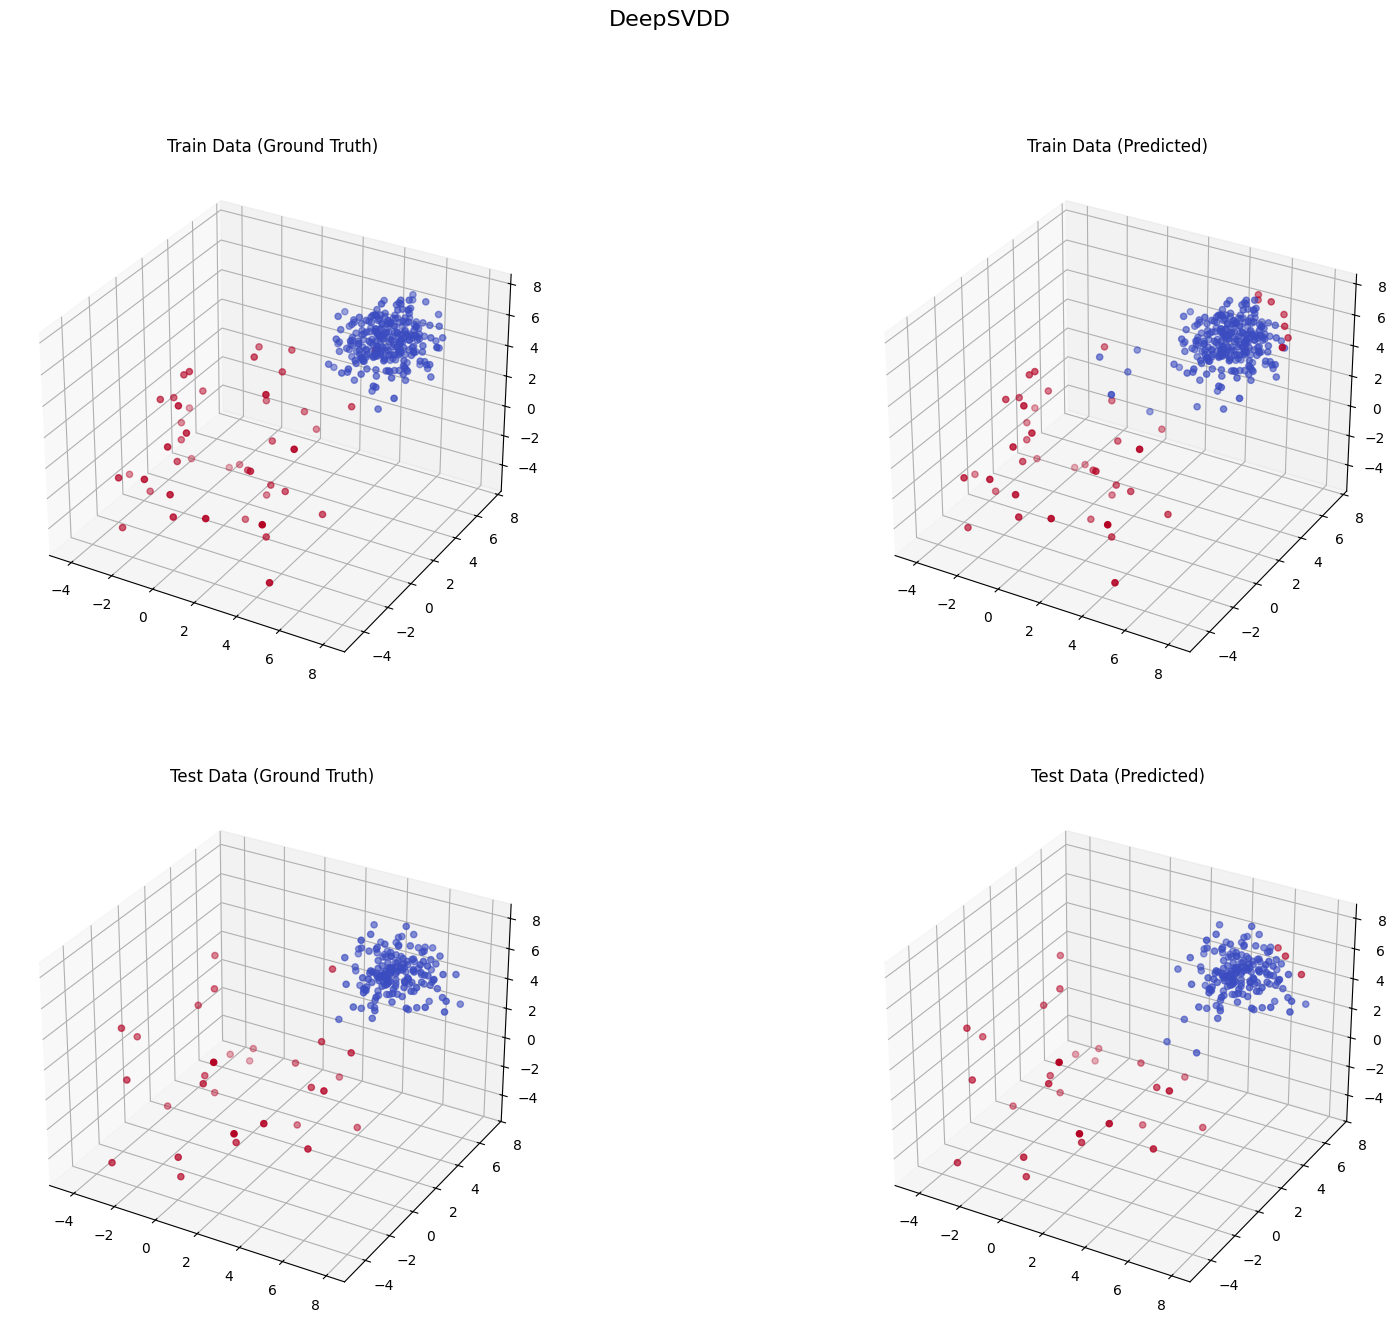

In [8]:
print("--- DeepSVDD ---")
# Note: DeepSVDD might require more epochs or specific tuning depending on the data distribution
deep_svdd = DeepSVDD(contamination=contamination, epochs=10, verbose=0, random_state=1,n_features=X_train.shape[1])
deep_svdd.fit(X_train)

# Predict
y_train_pred_deep = deep_svdd.predict(X_train)
y_test_pred_deep = deep_svdd.predict(X_test)
y_test_scores_deep = deep_svdd.decision_function(X_test)

# Evaluate
ba_deep = balanced_accuracy_score(y_test, y_test_pred_deep)
roc_deep = roc_auc_score(y_test, y_test_scores_deep)

print(f"Balanced Accuracy: {ba_deep:.4f}")
print(f"ROC AUC: {roc_deep:.4f}")

# Visualize
plot_results(X_train, y_train, y_train_pred_deep, X_test, y_test, y_test_pred_deep, "DeepSVDD")